In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv("titanic.csv",usecols=['age','fare','survived'])
df

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [ ]:
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

survived      0
age         177
fare          0
dtype: int64

Xử lý dữ liệu trống

In [ ]:
def Mean_missing(df, Variable):
    mean = df[Variable].mean()
    df[Variable + '_mean'] = df[Variable].fillna(mean)


def Median_missing(df, Variable):
    median = df[Variable].median()
    df[Variable + '_median'] = df[Variable].fillna(median)

def ModeImputation_missing(df, Variable):
    value_count = df[Variable].value_counts()
    most_common_value = value_count.idxmax()
    df[Variable + '_mode'] = df[Variable].fillna(most_common_value)

def Random_missing(df, Variable):
    random_samples = df[Variable].dropna().sample(n = df[Variable].isnull().sum(), random_state = 0)
    random_samples.index = df[df[Variable].isnull()].index
    df[Variable + '_random']=df[Variable]
    df.loc[df[Variable].isnull(),Variable + '_random']=random_samples

def EndOfDist_missing(df, Variable):
    extreme = df.age.mean() + 3*df.age.std()
    df[Variable + '_EndDist']=df[Variable].fillna(extreme)

def ArbitraryValue_missing(df, Variable):
    for _ in range(177):
        arbi = random.randint(int(df[Variable].min()),int(df[Variable].max()))
        df[Variable +'_arbi'] = df[Variable].fillna(arbi)

def NewFea_Missing(df, Variable):
    df[Variable + '_NAN'] = np.where(df[Variable].isna(), 1, 0)
    scaler = MinMaxScaler()
    df['fare_nor'] = scaler.fit_transform(df[['fare']])
    df[Variable + '_newfea'] = df['age'].fillna(df['age'].median()) * (1 - df['age_NAN']) + df['fare_nor'] * df['age_NAN']


In [ ]:
Mean_missing(df, 'age')
Median_missing(df, 'age')
ModeImputation_missing(df, 'age')
Random_missing(df, 'age')
EndOfDist_missing(df, 'age')
ArbitraryValue_missing(df, 'age')
NewFea_Missing(df, 'age')

In [ ]:
df.head(10)

,survived,age,fare,age_mean,age_median,age_mode,age_random,age_EndDist,age_arbi,age_NAN,fare_nor,age_newfea
0,0,22.0,7.2500,22.000000,22.0,22.0,22.0,22.00000,22.0,0,0.014151,22.00000
1,1,38.0,71.2833,38.000000,38.0,38.0,38.0,38.00000,38.0,0,0.139136,38.00000
2,1,26.0,7.9250,26.000000,26.0,26.0,26.0,26.00000,26.0,0,0.015469,26.00000
3,1,35.0,53.1000,35.000000,35.0,35.0,35.0,35.00000,35.0,0,0.103644,35.00000
4,0,35.0,8.0500,35.000000,35.0,35.0,35.0,35.00000,35.0,0,0.015713,35.00000
5,0,NaN,8.4583,29.699118,28.0,24.0,28.0,73.27861,24.0,1,0.016510,0.01651
6,0,54.0,51.8625,54.000000,54.0,54.0,54.0,54.00000,54.0,0,0.101229,54.00000
7,0,2.0,21.0750,2.000000,2.0,2.0,2.0,2.00000,2.0,0,0.041136,2.00000
8,1,27.0,11.1333,27.000000,27.0,27.0,27.0,27.00000,27.0,0,0.021731,27.00000
9,1,14.0,30.0708,14.000000,14.0,14.0,14.0,14.00000,14.0,0,0.058694,14.00000


Xử lý ngoại lệ

In [ ]:
#Phân bố chuẩn
def Outlier_Gaussian(df,Variable):
    df[Variable + '_Gaussian'] = df[Variable]
    uppper_boundary = df[Variable + '_Gaussian'].mean() + 3* df[Variable+ '_Gaussian'].std()
    lower_boundary = df[Variable+ '_Gaussian'].mean() - 3* df[Variable+ '_Gaussian'].std()
    df.loc[df[Variable + '_Gaussian']>=uppper_boundary, Variable + '_Gaussian'] = uppper_boundary
    df.loc[df[Variable + '_Gaussian']<=lower_boundary, Variable + '_Gaussian' ] = lower_boundary

#Phân bố lệch
def Outlier_Skewed(df,Variable):
    df[Variable + '_Skewed'] = df[Variable]
    IQR= df[Variable + '_Skewed'].quantile(0.75) - df[Variable + '_Skewed'].quantile(0.25)
    lower_bridge=df[Variable+ '_Skewed'].quantile(0.25)-(IQR*3)
    upper_bridge=df[Variable+ '_Skewed'].quantile(0.75)+(IQR*3)
    df.loc[df[Variable + '_Skewed']>=upper_bridge, Variable + '_Skewed'] = upper_bridge
    df.loc[df[Variable + '_Skewed']<=lower_bridge, Variable + '_Skewed' ] = lower_bridge

Xử lý trên cột Age

In [ ]:
for i in ['age_mean', 'age_median', 'age_mode', 'age_random', 'age_EndDist', 'age_arbi', 'age_newfea']:
    Outlier_Gaussian(df, i)
    Outlier_Skewed(df, i)

In [ ]:
df.head(10)

,survived,age,fare,age_mean,age_median,age_mode,age_random,age_EndDist,age_arbi,age_NAN,...,age_mode_Gaussian,age_mode_Skewed,age_random_Gaussian,age_random_Skewed,age_EndDist_Gaussian,age_EndDist_Skewed,age_arbi_Gaussian,age_arbi_Skewed,age_newfea_Gaussian,age_newfea_Skewed
0,0,22.0,7.2500,22.000000,22.0,22.0,22.0,22.00000,22.0,0,...,22.0,22.0,22.0,22.0,22.00000,22.00000,22.0,22.0,22.00000,22.00000
1,1,38.0,71.2833,38.000000,38.0,38.0,38.0,38.00000,38.0,0,...,38.0,38.0,38.0,38.0,38.00000,38.00000,38.0,38.0,38.00000,38.00000
2,1,26.0,7.9250,26.000000,26.0,26.0,26.0,26.00000,26.0,0,...,26.0,26.0,26.0,26.0,26.00000,26.00000,26.0,26.0,26.00000,26.00000
3,1,35.0,53.1000,35.000000,35.0,35.0,35.0,35.00000,35.0,0,...,35.0,35.0,35.0,35.0,35.00000,35.00000,35.0,35.0,35.00000,35.00000
4,0,35.0,8.0500,35.000000,35.0,35.0,35.0,35.00000,35.0,0,...,35.0,35.0,35.0,35.0,35.00000,35.00000,35.0,35.0,35.00000,35.00000
5,0,NaN,8.4583,29.699118,28.0,24.0,28.0,73.27861,24.0,1,...,24.0,24.0,28.0,28.0,73.27861,73.27861,24.0,24.0,0.01651,0.01651
6,0,54.0,51.8625,54.000000,54.0,54.0,54.0,54.00000,54.0,0,...,54.0,54.0,54.0,54.0,54.00000,54.00000,54.0,54.0,54.00000,54.00000
7,0,2.0,21.0750,2.000000,2.0,2.0,2.0,2.00000,2.0,0,...,2.0,2.0,2.0,2.0,2.00000,2.00000,2.0,2.0,2.00000,2.00000
8,1,27.0,11.1333,27.000000,27.0,27.0,27.0,27.00000,27.0,0,...,27.0,27.0,27.0,27.0,27.00000,27.00000,27.0,27.0,27.00000,27.00000
9,1,14.0,30.0708,14.000000,14.0,14.0,14.0,14.00000,14.0,0,...,14.0,14.0,14.0,14.0,14.00000,14.00000,14.0,14.0,14.00000,14.00000


Xử lý trên cột fare

In [ ]:
Outlier_Gaussian(df, 'fare')
Outlier_Skewed(df, 'fare')

In [ ]:
df.head(10)

,survived,age,fare,age_mean,age_median,age_mode,age_random,age_EndDist,age_arbi,age_NAN,...,age_random_Gaussian,age_random_Skewed,age_EndDist_Gaussian,age_EndDist_Skewed,age_arbi_Gaussian,age_arbi_Skewed,age_newfea_Gaussian,age_newfea_Skewed,fare_Gaussian,fare_Skewed
0,0,22.0,7.2500,22.000000,22.0,22.0,22.0,22.00000,22.0,0,...,22.0,22.0,22.00000,22.00000,22.0,22.0,22.00000,22.00000,7.2500,7.2500
1,1,38.0,71.2833,38.000000,38.0,38.0,38.0,38.00000,38.0,0,...,38.0,38.0,38.00000,38.00000,38.0,38.0,38.00000,38.00000,71.2833,71.2833
2,1,26.0,7.9250,26.000000,26.0,26.0,26.0,26.00000,26.0,0,...,26.0,26.0,26.00000,26.00000,26.0,26.0,26.00000,26.00000,7.9250,7.9250
3,1,35.0,53.1000,35.000000,35.0,35.0,35.0,35.00000,35.0,0,...,35.0,35.0,35.00000,35.00000,35.0,35.0,35.00000,35.00000,53.1000,53.1000
4,0,35.0,8.0500,35.000000,35.0,35.0,35.0,35.00000,35.0,0,...,35.0,35.0,35.00000,35.00000,35.0,35.0,35.00000,35.00000,8.0500,8.0500
5,0,NaN,8.4583,29.699118,28.0,24.0,28.0,73.27861,24.0,1,...,28.0,28.0,73.27861,73.27861,24.0,24.0,0.01651,0.01651,8.4583,8.4583
6,0,54.0,51.8625,54.000000,54.0,54.0,54.0,54.00000,54.0,0,...,54.0,54.0,54.00000,54.00000,54.0,54.0,54.00000,54.00000,51.8625,51.8625
7,0,2.0,21.0750,2.000000,2.0,2.0,2.0,2.00000,2.0,0,...,2.0,2.0,2.00000,2.00000,2.0,2.0,2.00000,2.00000,21.0750,21.0750
8,1,27.0,11.1333,27.000000,27.0,27.0,27.0,27.00000,27.0,0,...,27.0,27.0,27.00000,27.00000,27.0,27.0,27.00000,27.00000,11.1333,11.1333
9,1,14.0,30.0708,14.000000,14.0,14.0,14.0,14.00000,14.0,0,...,14.0,14.0,14.00000,14.00000,14.0,14.0,14.00000,14.00000,30.0708,30.0708


Vẽ histogram sau khi xử lý ngoại lệ

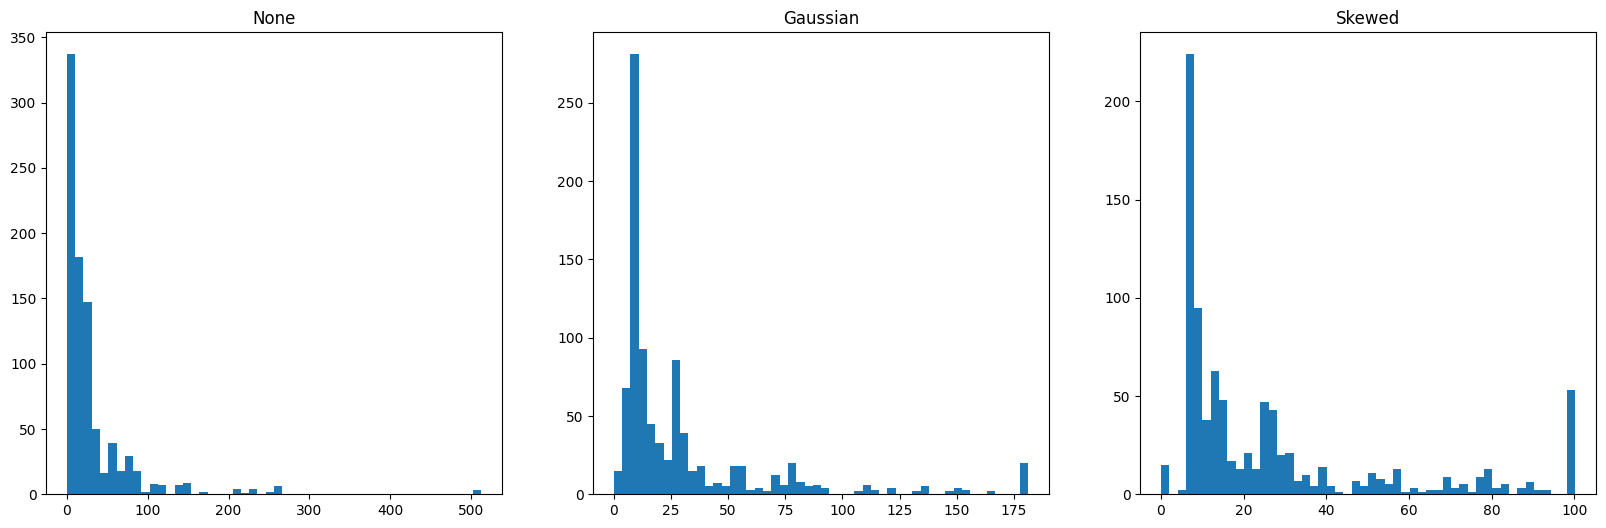

In [ ]:
def drawAllOfExcept(df,variable):
    # Tạo figure và axes
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    # Vẽ histogram cho từng mẫu dữ liệu trên các axes tương ứng
    axs[0].hist(df[variable], bins=50)
    axs[1].hist(df[variable + '_Gaussian'], bins=50)
    axs[2].hist(df[variable + '_Skewed'], bins=50)

    # Đặt tiêu đề cho từng axes
    axs[0].set_title('None')
    axs[1].set_title('Gaussian')
    axs[2].set_title('Skewed')

    # Hiển thị biểu đồ
    plt.show()
drawAllOfExcept(df,'fare')

Hàm tính độ chính xác

In [ ]:
def predict(df, VariableAge, VariableFare):
    accuracy = []
    for i in range(0,10):
        x_train, x_test, y_train, y_test = train_test_split(df[[VariableAge, VariableFare]], df['survived'], test_size=0.3, random_state=i, stratify=df['survived'])
        classifier = LogisticRegression(solver= "liblinear", max_iter= 1000)
        # đưa dữ liệu vào để train
        classifier.fit(x_train, y_train)
        # dự đoán
        y_predict = classifier.predict(x_test)
        accuracy.append(accuracy_score(y_test, y_predict))
    return np.average(accuracy)


**Bảng Kết Quả**

In [ ]:
def result(df):
    accuracyScore = []
    position = 0
    for i in ['fare','fare_Gaussian','fare_Skewed']:
        for j in ['None','Gaussian','Skewed']:
            if j == 'None':
                for name in ['age_mean', 'age_median', 'age_mode', 'age_random', 'age_EndDist', 'age_arbi', 'age_newfea']:
                    accuracyScore.append([position, name, j, i, predict(df, i, name)])
                    position +=1
            if j == 'Gaussian':
                for name in ['age_mean_Gaussian', 'age_median_Gaussian', 'age_mode_Gaussian', 'age_random_Gaussian', 'age_EndDist_Gaussian', 'age_arbi_Gaussian', 'age_newfea_Gaussian']:
                    accuracyScore.append([position, name, j, i, predict(df, i, name)])
                    position +=1
            if j == 'Skewed':
                for name in ['age_mean_Skewed', 'age_median_Skewed', 'age_mode_Skewed', 'age_random_Skewed', 'age_EndDist_Skewed', 'age_arbi_Skewed', 'age_newfea_Skewed']:
                    accuracyScore.append([position, name, j, i, predict(df, i, name)])
                    position +=1

    max_val = float('-inf')
    max_row = accuracyScore
    for row in accuracyScore:
        if float(row[4]) > max_val:
            max_val = float(row[4])
            max_row = row
    print(f"The maximum value is: {max_row}")

    min_val = float('inf')
    min_row = accuracyScore
    for row in accuracyScore:
        if float(row[4]) < min_val:
            min_val = float(row[4])
            min_row = row
    print(f"The minimum value is: {min_row}")

    plt.figure(figsize=(12,15), dpi=150)
    ColLabel=("STT","KT xử lý dữ liệu trống AGE", "KT xử lý ngoại lệ AGE", "KT xử lý ngoại lệ FARE", "Độ chính xác TB sau 10 lần lặp")
    plt.axis('off')
    plt.axis('tight')
    the_table = plt.table(cellText = accuracyScore, colLabels=ColLabel, loc='center', cellLoc= 'left')
    the_table[(max_row[0] +1, 4)].set_facecolor("#56b5fd")
    the_table[(min_row[0] +1, 4)].set_facecolor("#FF0000")
    plt.tight_layout()
    plt.show()

The maximum value is: [25, 'age_EndDist', 'None', 'fare_Gaussian', 0.6798507462686567]
The minimum value is: [1, 'age_median', 'None', 'fare', 0.6578358208955224]


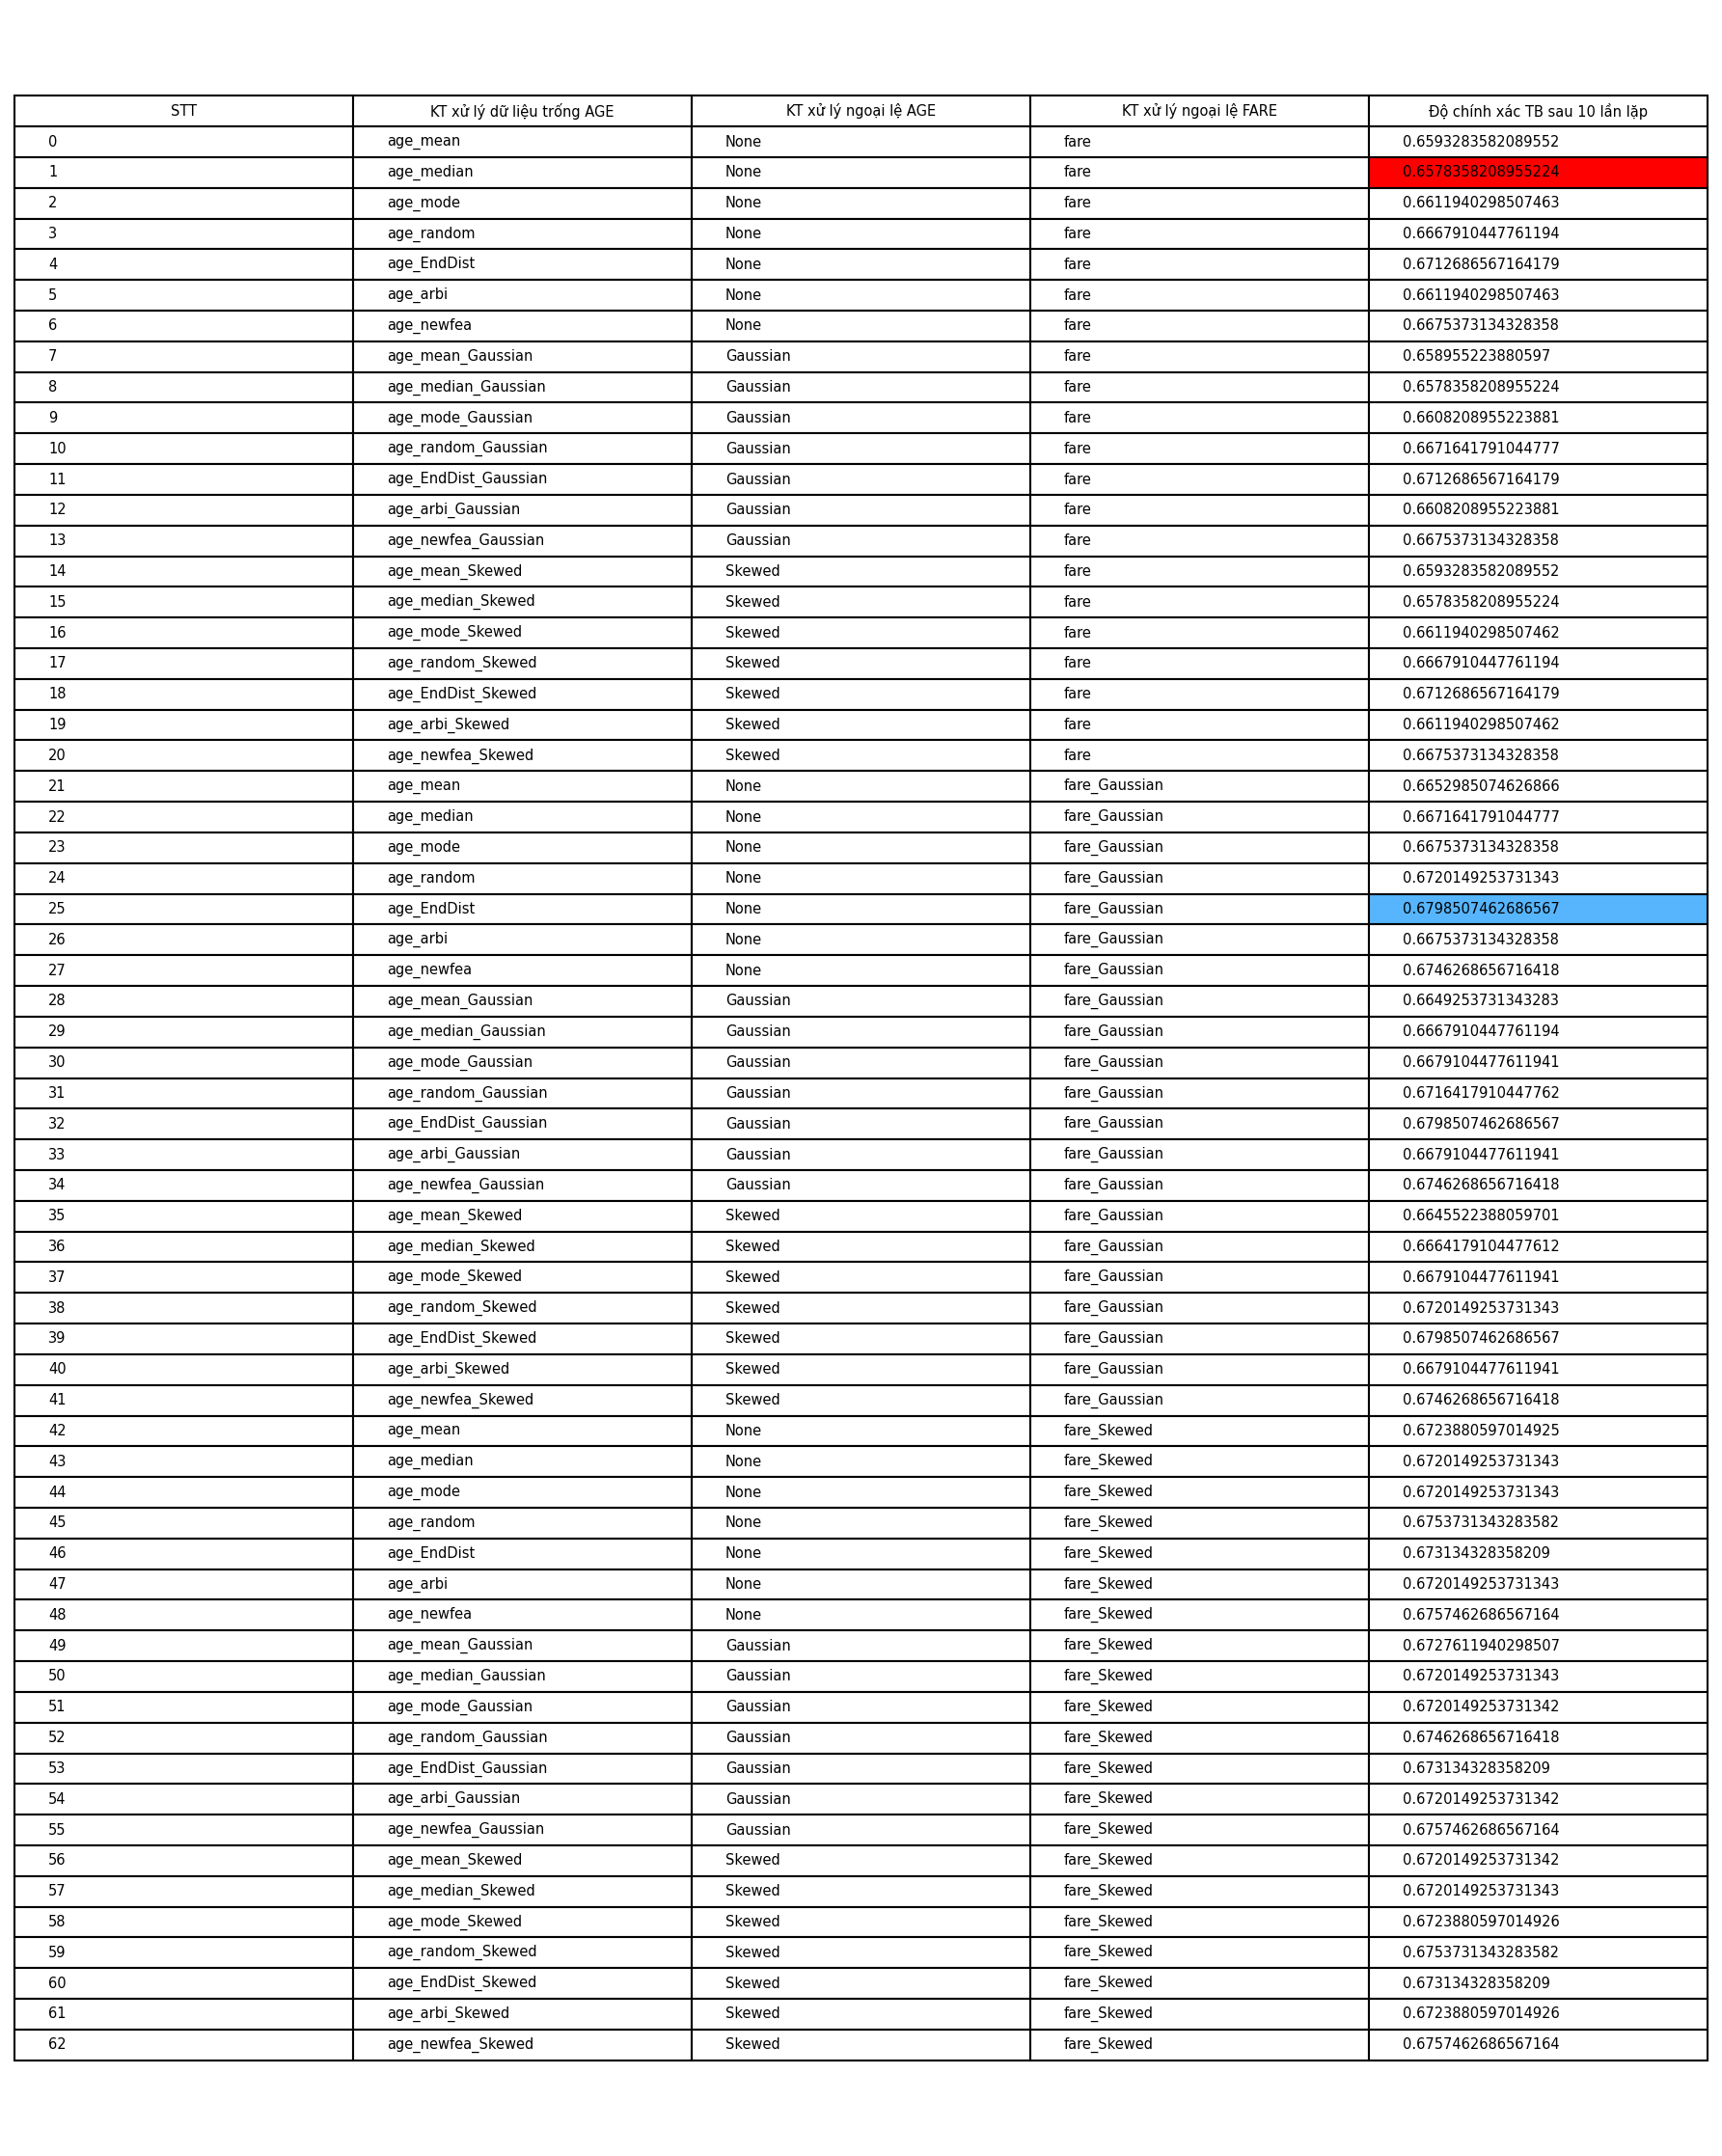

In [ ]:
result(df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [ ]:
data = df[['survived', 'age', 'fare', 'age_EndDist', 'fare_Gaussian']].copy()
data

,survived,age,fare,age_EndDist,fare_Gaussian
0,0,22.0,7.2500,22.00000,7.2500
1,1,38.0,71.2833,38.00000,71.2833
2,1,26.0,7.9250,26.00000,7.9250
3,1,35.0,53.1000,35.00000,53.1000
4,0,35.0,8.0500,35.00000,8.0500
...,...,...,...,...,...
886,0,27.0,13.0000,27.00000,13.0000
887,1,19.0,30.0000,19.00000,30.0000
888,0,NaN,23.4500,73.27861,23.4500
889,1,26.0,30.0000,26.00000,30.0000


Hàm tính độ chính xác

In [ ]:
def acc_52(X, y):
    acc_result=[]
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

        # Huấn luyện mô hình
        classifier = LogisticRegression(random_state = i)
        classifier.fit(X_train, y_train)

        # Dự đoán mô hình
        y_pred = classifier.predict(X_test)
        # Kết quả dự đoán
        acc_result.append(accuracy_score(y_test, y_pred))
    return acc_result

Hàm tính độ chính xác của các kỹ thuật chuẩn hóa

In [ ]:
acc_Scalar = []
list_scalars = [MinMaxScaler(), MaxAbsScaler(), StandardScaler(), RobustScaler(), Normalizer(), QuantileTransformer(), PowerTransformer()]
for i in list_scalars:
    data[['Age_EndDist_Scaler','Fare_Gaussian_Scaler']] = i.fit_transform(data[['age_EndDist','fare_Gaussian']])
    X = data.iloc[:, [5,6]].values

    y = data.iloc[:, [0]].values
    y = y.ravel()
    acc = acc_52(X,y)
    acc_Scalar.append(np.mean(acc))
    print(" Accuracy_mean",i, np.mean(acc))

 Accuracy_mean MinMaxScaler() 0.6675373134328357
 Accuracy_mean MaxAbsScaler() 0.6675373134328357
 Accuracy_mean StandardScaler() 0.6697761194029851
 Accuracy_mean RobustScaler() 0.6701492537313433
 Accuracy_mean Normalizer() 0.6914179104477614
 Accuracy_mean QuantileTransformer() 0.6686567164179105
 Accuracy_mean PowerTransformer() 0.6701492537313432


d:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn(


In [ ]:
def scalers(df, variable):
    df_scalers = df.copy()
    cols_except_Survived = df.drop('survived', axis=1).columns.tolist()
    df_scalers = variable.fit_transform(df_scalers[cols_except_Survived])

    df_scalers = pd.DataFrame(df_scalers, columns=cols_except_Survived)
    df_scalers.insert(0, 'survived', df['survived'])
    return df_scalers

In [ ]:
df_Normalizer = scalers(df.drop('age', axis=1), Normalizer())

Trực quan hóa dữ liệu trước và sau chuẩn hóa

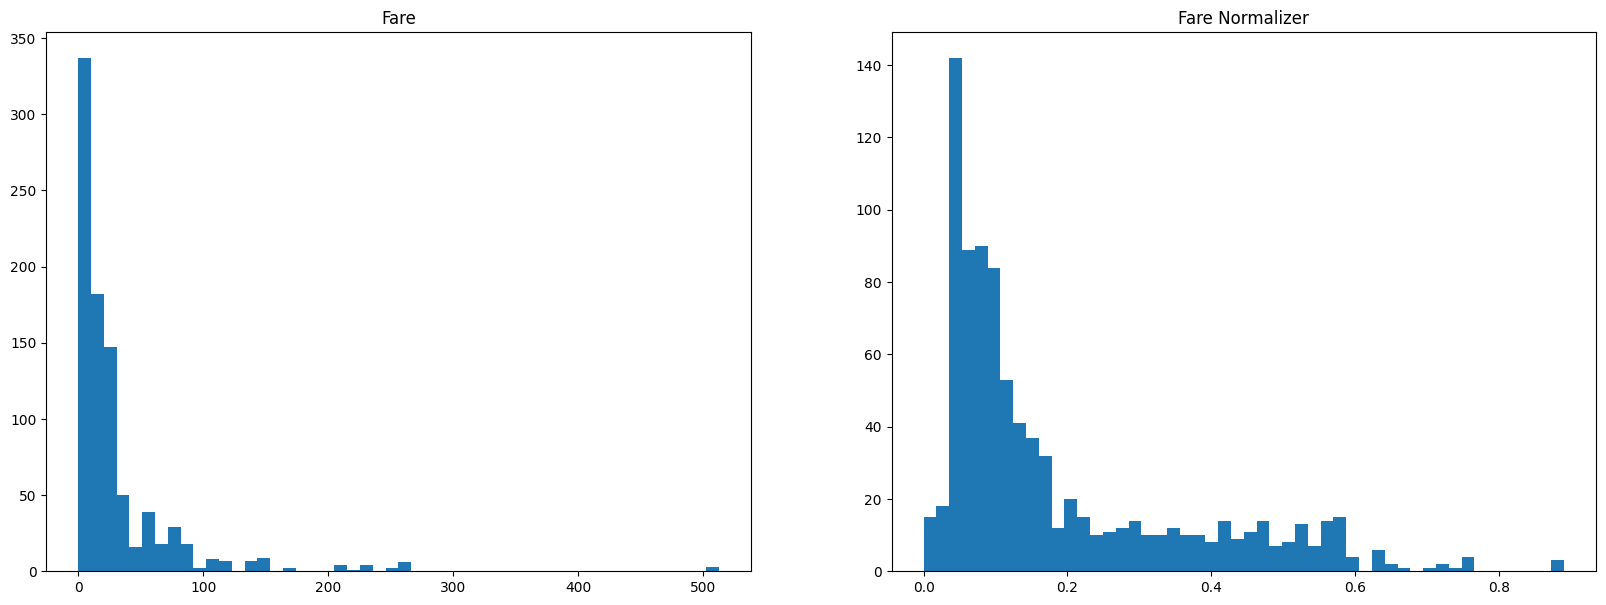

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

# Vẽ histogram cho từng mẫu dữ liệu trên các axes tương ứng

axs[0].hist(df["fare"], bins=50)
axs[1].hist(df_Normalizer["fare"], bins=50)

axs[0].set_title('Fare')
axs[1].set_title('Fare Normalizer')

# Hiển thị biểu đồ
plt.show()

#### Feature selection (Random Forest & Linear Regression)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [ ]:
y = df['survived']
X = df.drop(['age', 'fare', 'survived'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, df['survived'], test_size=0.3, random_state=10, stratify=df['survived'])

# khởi tạo mô hinh phân lớp
classifier = LogisticRegression(solver="liblinear", max_iter=1000)

# Hồi qui theo RandomForest
rdFrt = RandomForestClassifier(n_estimators=10, random_state=1, max_depth=20)
# Hồi qui theo LinearSVC
lnSVC = LinearSVC(C=0.01, penalty="l1", dual=False)
# Tạo một pipeline thực hiện lựa chọn biến từ RandomForest model và hồi qui theo logit
pipe1 = make_pipeline(StandardScaler(), SelectFromModel(
    estimator=rdFrt), classifier)
# Tạo một pipeline thực hiện lựa chọn biến từ Linear SVC model và hồi qui theo logit
pipe2 = make_pipeline(StandardScaler(), SelectFromModel(
    estimator=lnSVC), classifier)
# Cross validate đối với
# 1. Mô hình logit
acc_log = cross_val_score(classifier, X_train, y_train,
                          scoring='accuracy', cv=10).mean()
# 2. Mô hình RandomForest
acc_rdf = cross_val_score(rdFrt, X_train, y_train,
                          scoring='accuracy', cv=10).mean()
# 3. Mô hình pipe1
acc_pip1 = cross_val_score(pipe1, X_train, y_train,
                           scoring='accuracy', cv=10).mean()
# 3. Mô hình pipe2
acc_pip2 = cross_val_score(pipe2, X_train, y_train,
                           scoring='accuracy', cv=10).mean()

print('Accuracy theo logit:', acc_log)
print('Accuracy theo random forest:', acc_rdf)
print('Accuracy theo pipeline 1:', acc_pip1)
print('Accuracy theo pipeline 2:', acc_pip2)


Accuracy theo logit: 0.6756272401433693
Accuracy theo random forest: 0.6273681515617
Accuracy theo pipeline 1: 0.6788018433179724
Accuracy theo pipeline 2: 0.6804403481822837


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
import numpy as np

Tính độ chính xác của từng Pipeline

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

acc_pipe = []
list_func = [MinMaxScaler(),MaxAbsScaler(),StandardScaler(),RobustScaler(),Normalizer(),QuantileTransformer(),PowerTransformer()]
for i in list_func:
    pipeline = make_pipeline(
        i,
        LogisticRegression()
    )
    X = df[['age_EndDist', 'fare']]
    y= df['survived']
    cv_results = cross_validate(pipeline, X, y, cv=5)
    accuracy = cv_results['test_score'].mean()
    acc_pipe.append(accuracy)
for i in range(7):
    print('Accuracy' , list_func[i],':', acc_pipe[i])

Accuracy MinMaxScaler() : 0.6476366831962841
Accuracy MaxAbsScaler() : 0.6476366831962841
Accuracy StandardScaler() : 0.6678739564371351
Accuracy RobustScaler() : 0.6678739564371351
Accuracy Normalizer() : 0.6925993346305945
Accuracy QuantileTransformer() : 0.6735295963844077
Accuracy PowerTransformer() : 0.6723997238089259


d:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (712). n_quantiles is set to n_samples.
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (713). n_quantiles is set to n_samples.
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (713). n_quantiles is set to n_samples.
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (713). n_quantiles is set to n_samples.
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (713). n_quantiles is set to n_samples.
  warnings.warn(


Bảng so sánh kết quả

In [ ]:
def result_table():
    accuracyScore = []
    for i in range(0,7):
            accuracyScore.append([list_func[i], acc_Scalar[i],acc_pipe[i]])

    max_val = float('-inf')
    max_row = accuracyScore
    for row in accuracyScore:
        if float(row[1]) > max_val:
            max_val = float(row[1])
            max_row = row
    print(f" Max value is: {max_row}")

    min_val = float('inf')
    min_row = accuracyScore
    for row in accuracyScore:
        if float(row[1]) < min_val:
            min_val = float(row[1])
            min_row = row
    print(f" Min value is: {min_row}")
    max_pipe = float('-inf')
    max_row1 = accuracyScore
    for row in accuracyScore:
        if float(row[2]) > max_pipe:
            max_pipe = float(row[2])
            max_row1 = row
    min_pipe = float('inf')
    min_row1 = accuracyScore
    for row1 in accuracyScore:
        if float(row1[2]) < min_pipe:
            min_pipe = float(row1[2])
            min_row1 = row1
    # print(f" Min value is: {min_row1}")
    plt.figure(figsize=(8,10), dpi=100)
    ColLabel=("Tên kỹ thuật","Repeated Hold-out", "5-fold cross-validation")
    plt.axis('off')
    plt.axis('tight')
    the_table = plt.table(cellText = accuracyScore, colLabels=ColLabel, loc='top', cellLoc= 'left')
    the_table[(accuracyScore.index(max_row)+1, 1)].set_facecolor("#56b5fd")
    the_table[(accuracyScore.index(min_row)+1, 1)].set_facecolor("#FF0000")
    the_table[(accuracyScore.index(max_row1)+1, 2)].set_facecolor("#56b5fd")
    the_table[(accuracyScore.index(min_row1)+1, 2)].set_facecolor("#FF0000")
    plt.tight_layout()
    plt.show()

 Max value is: [Normalizer(), 0.6914179104477614, 0.6925993346305945]
 Min value is: [MinMaxScaler(), 0.6675373134328357, 0.6476366831962841]


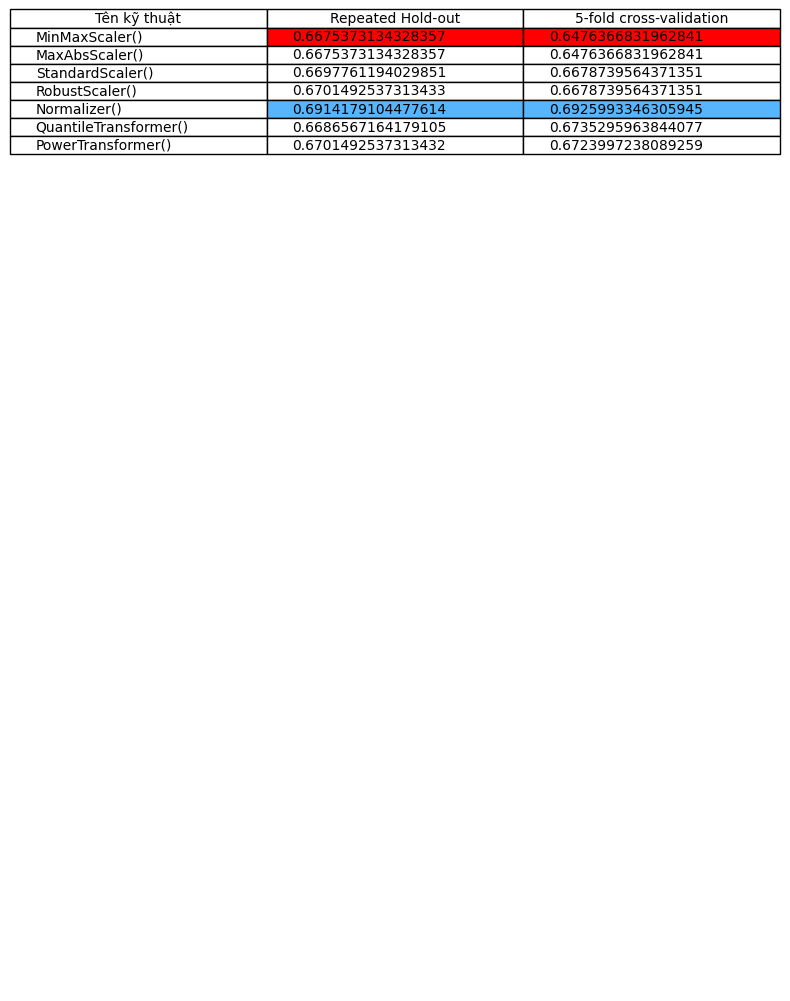

In [ ]:
result_table()

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import scipy

Chia bộ dữ liệu thành tập train và test

In [ ]:
scaler = Normalizer()
data[['age_EndDist_Scaler','fare_Gaussian_Scaler']] = scaler.fit_transform(data[['age_EndDist','fare_Gaussian']])
# input
X = data.iloc[:, [5,6]].values

#output
y = data.iloc[:, [0]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Lựa chọn mô hình Logistic

In [ ]:
# Mô hình logistic regression với solver là 'saga'
model = LogisticRegression(solver='saga', random_state=0)

# Khai báo các siêu tham số và phân phối ngẫu nhiên cho các giá trị của chúng
param_dist = {'penalty': ['l1', 'l2', 'none'],
              'C': scipy.stats.expon(scale=1)}

# Tạo RandomizedSearchCV object với 5-fold cross-validation
random_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=5, n_iter=100)

# Huấn luyện RandomizedSearchCV object trên Training set
random_search.fit(X_train, y_train)

# In bộ siêu tham số tốt nhất của mô hình
print('Best HyperParameters:', random_search.best_params_)
print('Best score:', random_search.best_score_)

d:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warn

Best HyperParameters: {'C': 0.056779030980048995, 'penalty': 'l2'}
Best score: 0.6693806451612903


d:\Python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

Huấn luyện mô hình với bộ tham số lấy từ trên

In [ ]:
# Tạo mô hình logistic regression với bộ siêu tham số tốt nhất lấy từ trên (solve : thuật toán , penalty :điều chuẩn)
lr = LogisticRegression(penalty='l2', C=0.057588754515073476,solver='saga')
# Huấn luyện mô hình với Training set
lr.fit(X_train, y_train)

d:\Python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.057588754515073476, solver='saga')

Tính độ chính xác trên tập test

In [ ]:
from sklearn.metrics import accuracy_score
import tensorflow as tf
# Dự đoán nhãn của Test set
y_pred = lr.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7052238805970149
